<a href="https://colab.research.google.com/github/Muskankumari13/Supervised-Learning-Models/blob/main/supervised_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load dataset**

In [67]:
# import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# assuming df is your cleaned DataFrame from above steps

df=pd.read_csv("train.csv")
df.head()

#check missing values
print(df.isna().sum())

# fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# drop cabin column
df.drop('Cabin', axis=1, inplace=True)
# check missing values
print(df.isna().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-1645763770.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1645763770.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

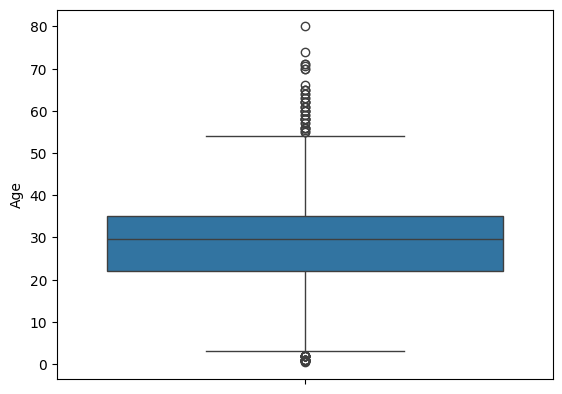

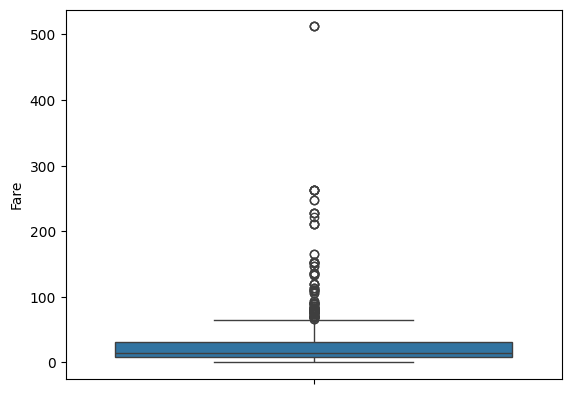

In [68]:
# check outliers in Age , Fare columns
sns.boxplot(df['Age'])
plt.show()
sns.boxplot(df['Fare'])
plt.show()

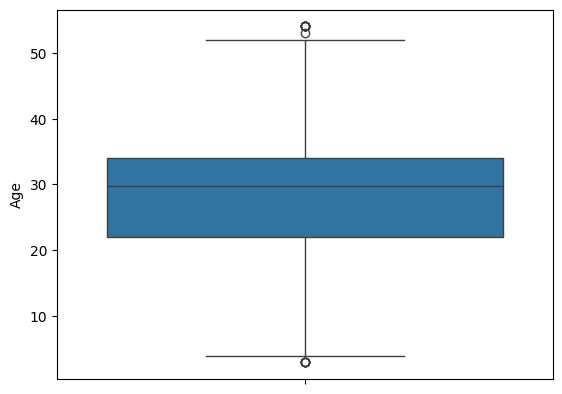

In [69]:
# remove outliers in Age  column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Age'] >= Q1 - 1.5 * IQR) & (df['Age'] <= Q3 + 1.5 * IQR)]
sns.boxplot(df['Age'])
plt.show()


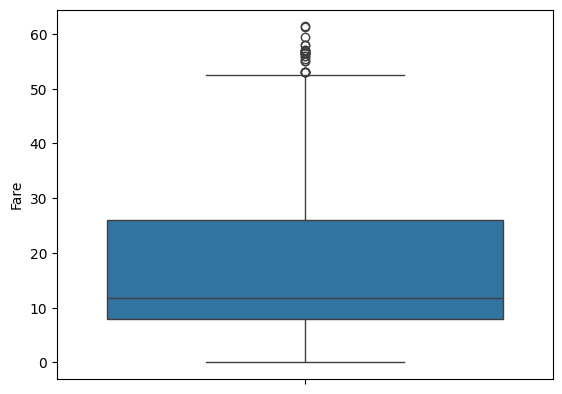

In [70]:
# remove outliers in Fare column
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]
sns.boxplot(df['Fare'])
plt.show()


In [71]:
X = df.drop('Survived', axis=1)  # drop target column from features
Y = df['Survived']  # target variable
# split dataset into train and test to avoid data leakage
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# select numerical and categorical columns separately
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# create preprocessor to scale numeric features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# **Logistic Regression model**

In [72]:
# create pipeline to apply preprocessing then logistic regression model
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression())
])

# fit pipeline on training data
pipeline.fit(X_train, Y_train)

# predict on test data
y_pred = pipeline.predict(X_test)

print("Model training and prediction completed successfully.")
from sklearn.metrics import accuracy_score
Logistic_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of Logictic regression model:", Logistic_accuracy)

Model training and prediction completed successfully.
Accuracy of Logictic regression model: 0.7777777777777778


# **Random Forest Classifier Model**

In [73]:
from sklearn.ensemble import RandomForestClassifier
# create pipeline to apply preprocessing then RandomForestClassifier
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier())
])

# fit pipeline on training data
pipeline.fit(X_train, Y_train)

# predict on test data
y_pred = pipeline.predict(X_test)

print("Model training and prediction completed successfully.")
random_forest_classifier_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of random forest classifier:", random_forest_classifier_accuracy)

Model training and prediction completed successfully.
Accuracy of random forest classifier: 0.7847222222222222


# **Suppor vector Machine Model**

In [74]:
from sklearn.svm import SVC
# create pipeline to apply preprocessing then svm model
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', SVC())
])

# fit pipeline on training data
pipeline.fit(X_train, Y_train)

# predict on test data
y_pred = pipeline.predict(X_test)

print("Model training and prediction completed successfully.")
SVC_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of support vector classifier:", SVC_accuracy )

Model training and prediction completed successfully.
Accuracy of support vector classifier: 0.8055555555555556


# **K-Nearest Neighbors (KNN)**

In [75]:
from sklearn.neighbors import KNeighborsClassifier
# create pipeline to apply preprocessing then knn model
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier())
])

# fit pipeline on training data
pipeline.fit(X_train, Y_train)

# predict on test data
y_pred = pipeline.predict(X_test)

print("Model training and prediction completed successfully.")
knn_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of k-Nearest Neighbors :", knn_accuracy )

Model training and prediction completed successfully.
Accuracy of k-Nearest Neighbors : 0.7986111111111112


# **Decision Tree classifier  Model**

In [76]:
from sklearn.tree import DecisionTreeClassifier
# create pipeline to apply preprocessing then Decision Tree classifier model
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier())
])

# fit pipeline on training data
pipeline.fit(X_train, Y_train)

# predict on test data
y_pred = pipeline.predict(X_test)

print("Model training and prediction completed successfully.")
DecisionTreeClassifier_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of Decision Tree Classifier :", DecisionTreeClassifier_accuracy  )


Model training and prediction completed successfully.
Accuracy of Decision Tree Classifier : 0.8263888888888888


# ***Gradient Boosting Algorithm***

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
# create pipeline to apply preprocessing then Gradient Boosting  model
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingClassifier())
])

# fit pipeline on training data
pipeline.fit(X_train, Y_train)

# predict on test data
y_pred = pipeline.predict(X_test)

print("Model training and prediction completed successfully.")
GradientBoostingClassifier_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of Gradient Boosting Classifier :",GradientBoostingClassifier_accuracy)


Model training and prediction completed successfully.
Accuracy of Gradient Boosting Classifier : 0.8055555555555556


# **XGBoost (Extreme Gradient Boosting)**

In [78]:
import xgboost as xgb
from xgboost import XGBClassifier
# create pipeline to apply preprocessing then Gradient Boosting  model
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBClassifier())
])

# fit pipeline on training data
pipeline.fit(X_train, Y_train)

# predict on test data
y_pred = pipeline.predict(X_test)

print("Model training and prediction completed successfully.")
XGBClassifier_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of GXGBClassifier :",XGBClassifier_accuracy)

Model training and prediction completed successfully.
Accuracy of GXGBClassifier : 0.8194444444444444


# **Light GBM Model**

In [79]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
# create pipeline to apply preprocessing then LGBM Classifier  model
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LGBMClassifier(n_estimators=200 , learning_rate=0.05, max_depth=-1 , random_state=42))
])

# fit pipeline on training data
pipeline.fit(X_train, Y_train)

# predict on test data
y_pred = pipeline.predict(X_test)

print("Model training and prediction completed successfully.")
LGBMClassifier_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of LGBMClassifier :",LGBMClassifier_accuracy)


[LightGBM] [Info] Number of positive: 191, number of negative: 383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 574, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332753 -> initscore=-0.695762
[LightGBM] [Info] Start training from score -0.695762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [80]:
# Accuracy results saved in dictionary
accuracy_results = {
    "Logistic Regression": Logistic_accuracy,
    "KNN (K Nearest neighbor)": knn_accuracy,
    "SVM ( Support Vector Machine)": SVC_accuracy ,
    "Decision Tree classifier": DecisionTreeClassifier_accuracy,
    "Random Forest classifier": random_forest_classifier_accuracy ,
    "Gradient Boosting classifier ": GradientBoostingClassifier_accuracy,
    "xgboost (extreme gradient boosting)": XGBClassifier_accuracy,
    "LGBM (Light Gradient Boosting Machine)": LGBMClassifier_accuracy
}

# convert dictionary into dataframe
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

# sort accuracies in ascending orders
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(accuracy_df)


                                    Model  Accuracy
0                Decision Tree classifier  0.826389
1  LGBM (Light Gradient Boosting Machine)  0.819444
2     xgboost (extreme gradient boosting)  0.819444
3           SVM ( Support Vector Machine)  0.805556
4           Gradient Boosting classifier   0.805556
5                KNN (K Nearest neighbor)  0.798611
6                Random Forest classifier  0.784722
7                     Logistic Regression  0.777778
